<a href="https://colab.research.google.com/github/koksal100/Deep-Learning/blob/main/Detecting_Malaria_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
dataset_train, dataset_info_train = tfds.load("malaria",with_info=True,as_supervised=True,shuffle_files=True,split="train")


In [3]:
dataset_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [4]:
len(dataset_train)

27558

,image,label
0,,1 (uninfected)
1,,1 (uninfected)
2,,0 (parasitized)
3,,1 (uninfected)
4,,1 (uninfected)
5,,0 (parasitized)
6,,1 (uninfected)
7,,1 (uninfected)
8,,0 (parasitized)
9,,0 (parasitized)

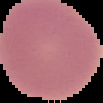
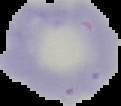
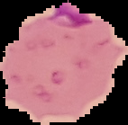
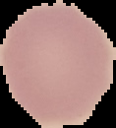
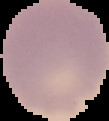
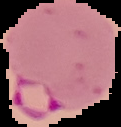
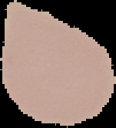
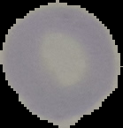
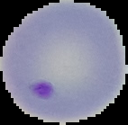
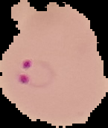
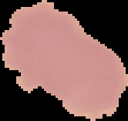
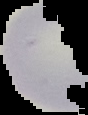
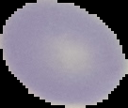
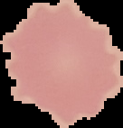
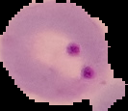
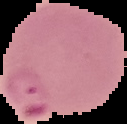
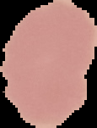
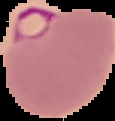
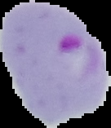
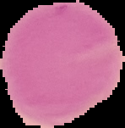

In [5]:

tfds.as_dataframe(dataset_train.take(20), dataset_info_train)

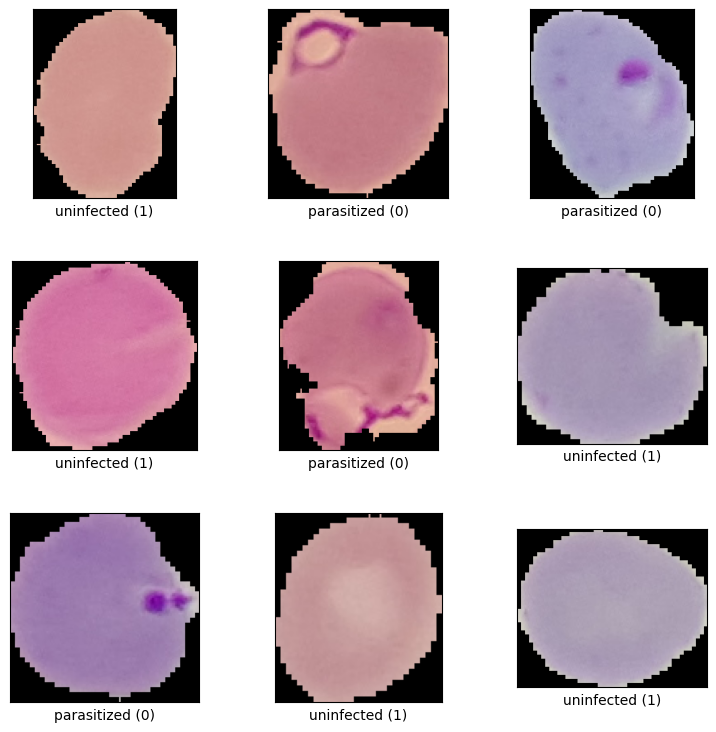

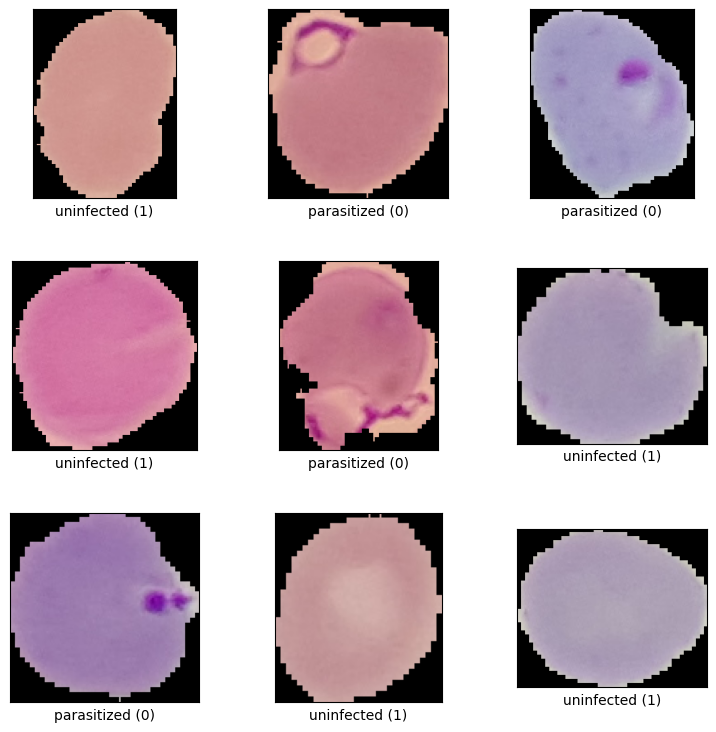

In [6]:
tfds.show_examples(dataset_train,dataset_info_train)

In [7]:
dataset_info_train

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [8]:
print(type(dataset_train))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [9]:
def im_resize(image,label):
  image=tf.image.resize(image,(224,224))/255.0
  return image,label

In [10]:
ds=dataset_train

In [11]:
ds=ds.map(im_resize)

In [12]:
for example in ds.take(1):
    print(example)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>, <tf.Tensor: shape=(), dtype=int6

In [13]:
ds=ds.shuffle(buffer_size=8).batch(32).prefetch(tf.data.AUTOTUNE)


Shuffling: The part ds.shuffle(buffer_size=8) shuffles the dataset. The parameter buffer_size=8 specifies the buffer size used for shuffling. In this case, shuffling is performed by taking 8 examples at a time. Shuffling is beneficial when the order of examples is not significant, as it helps the model generalize better.

Batching: The part ds.batch(32) divides the dataset into batches of a specified size. In this case, each batch contains 32 examples. Batching accelerates training and optimizes memory usage.

Prefetching: The part ds.prefetch(tf.data.AUTOTUNE) is used for prefetching the dataset. This ensures that the next batch is loaded into memory before the current batch is completely processed. The parameter tf.data.AUTOTUNE allows TensorFlow to dynamically determine the optimal number of elements to prefetch, enhancing training efficiency.

In [14]:
train_ds=ds.take(int(0.8*len(ds)))
validation_ds=ds.skip(int(0.8*len(ds)))

In [15]:
len(train_ds),len(validation_ds)

(689, 173)

In [16]:

from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.25),
  layers.RandomZoom(0.25),
  layers.RandomHeight(0.25),
  layers.RandomWidth(0.25),
  layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation_of_Emirhan")

In [17]:
model = keras.Sequential([
    tf.keras.layers.Input((224,224,3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = 'best_model.h5'
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

In [20]:
history = model.fit(train_ds,epochs=5,verbose=1,validation_data=validation_ds, callbacks=[model_checkpoint])

Epoch 1/5
689/689 [==============================] - ETA: 0s - loss: 0.1968 - accuracy: 0.9353
Epoch 1: val_accuracy improved from -inf to 0.93829, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


689/689 [==============================] - 66s 96ms/step - loss: 0.1968 - accuracy: 0.9353 - val_loss: 0.1783 - val_accuracy: 0.9383
Epoch 2/5
689/689 [==============================] - ETA: 0s - loss: 0.1557 - accuracy: 0.9492
Epoch 2: val_accuracy improved from 0.93829 to 0.94900, saving model to best_model.h5
689/689 [==============================] - 63s 92ms/step - loss: 0.1557 - accuracy: 0.9492 - val_loss: 0.1594 - val_accuracy: 0.9490
Epoch 3/5
689/689 [==============================] - ETA: 0s - loss: 0.1352 - accuracy: 0.9543
Epoch 3: val_accuracy improved from 0.94900 to 0.95172, saving model to best_model.h5
689/689 [==============================] - 74s 107ms/step - loss: 0.1352 - accuracy: 0.9543 - val_loss: 0.1519 - val_accuracy: 0.9517
Epoch 4/5
688/689 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9590
Epoch 4: val_accuracy improved from 0.95172 to 0.95372, saving model to best_model.h5
689/689 [==============================] - 67s 97ms/step 

<Axes: >

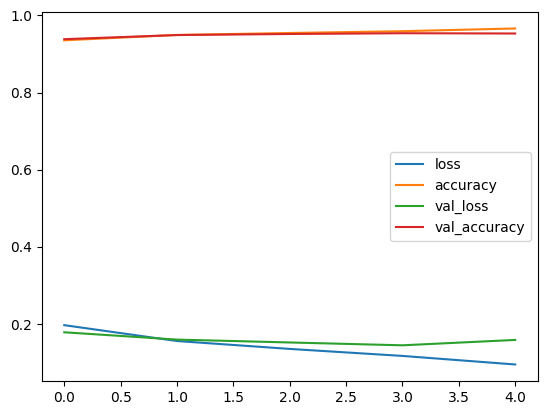

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot()

<Axes: >

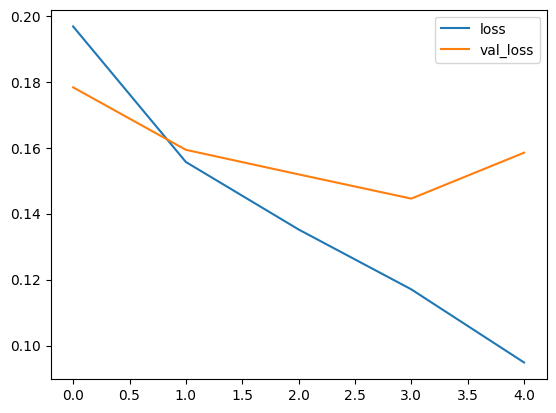

In [23]:
pd.DataFrame(history.history)[["loss","val_loss"]].plot()